<a href="https://colab.research.google.com/github/VarunRathod74/Projects/blob/main/cc_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing all the necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# **Loading the Data**

In [ ]:
data = pd.read_csv("CC_FRAUD2.csv")
data

,DOMAIN,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,1,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,1,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,38.85,38.85,LEGIT
2,2,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
3,2,355,18,18,0,0,0,0,0,0,1,3,1,-26.864,17,0,38.85,38.85,LEGIT
4,2,308,13,13,0,0,1,0,0,0,1,3,1,29.648,25,4,59.40,59.40,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,73,385,13,13,0,1,1,0,0,0,2,3,0,44.184,20,0,12.95,12.95,LEGIT
4252,73,385,12,12,0,1,1,0,0,0,2,2,1,45.696,7,4,12.95,12.95,LEGIT
4253,73,385,13,13,0,1,1,0,0,0,2,3,1,45.696,7,4,12.95,12.95,LEGIT
4254,74,602,16,16,0,0,0,1,1,0,1,2,0,0.048,24,0,38.85,38.85,LEGIT


# **Getting important details from the dataset**

In [ ]:
fraud = data[data['TRN_TYPE'] == "FRAUD"]
valid = data[data['TRN_TYPE'] == "LEGIT"]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['TRN_TYPE'] == "FRAUD"])))
print('Valid Transactions: {}'.format(len(data[data['TRN_TYPE'] == "LEGIT"])))

0.029262394195888754
Fraud Cases: 121
Valid Transactions: 4135


In [ ]:
print("Details of valid transaction")
valid.TOTAL_TRN_AMT.describe()

Details of valid transaction


count    4135.000000
mean       26.030563
std        14.167930
min         0.000000
25%        12.950000
50%        25.900000
75%        38.850000
max        89.950000
Name: TOTAL_TRN_AMT, dtype: float64

In [ ]:
print("Amount details of the fraudulent transaction")
fraud.TOTAL_TRN_AMT.describe()

Amount details of the fraudulent transaction


count    121.000000
mean      26.528017
std       13.830074
min       10.360000
25%       12.950000
50%       25.900000
75%       38.850000
max       59.400000
Name: TOTAL_TRN_AMT, dtype: float64

# **Plotting the Correlation Matrix**

<ipython-input-6-2fb8f3227521>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


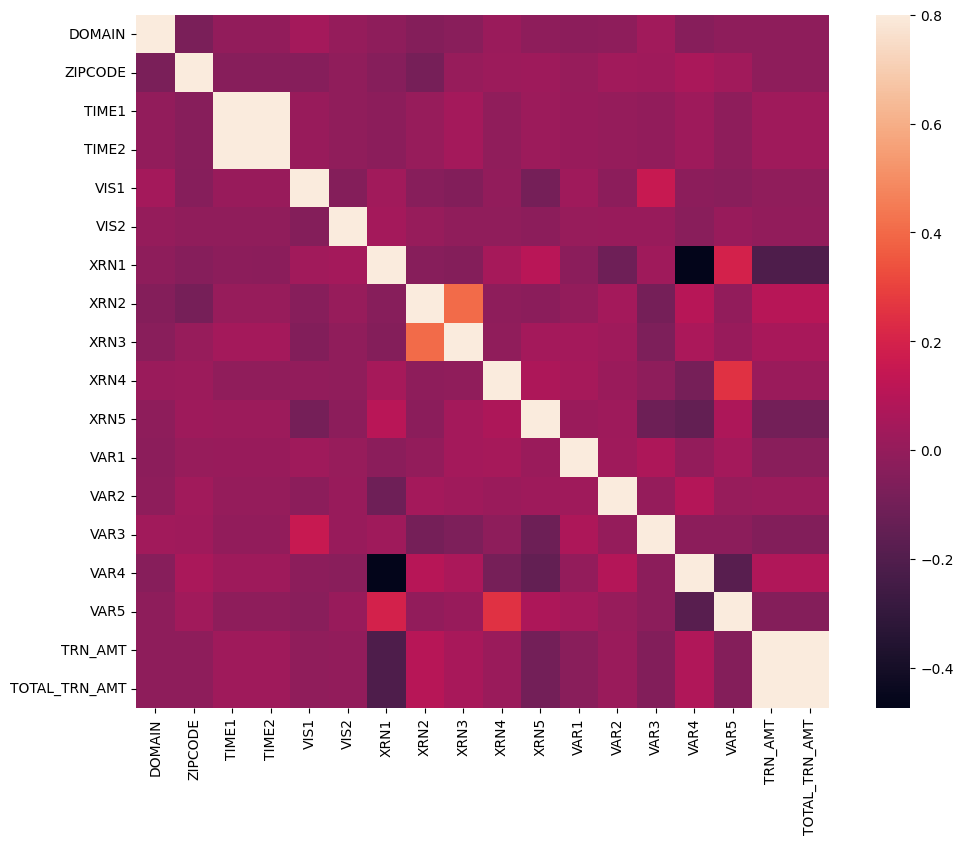

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# **Splitting into testing and training dataset**

In [ ]:
X = data.drop(['TRN_TYPE'], axis = 1)
Y = data["TRN_TYPE"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(4256, 18)
(4256,)


In [ ]:
X

,DOMAIN,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
0,1,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95
1,1,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,38.85,38.85
2,2,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85
3,2,355,18,18,0,0,0,0,0,0,1,3,1,-26.864,17,0,38.85,38.85
4,2,308,13,13,0,0,1,0,0,0,1,3,1,29.648,25,4,59.40,59.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,73,385,13,13,0,1,1,0,0,0,2,3,0,44.184,20,0,12.95,12.95
4252,73,385,12,12,0,1,1,0,0,0,2,2,1,45.696,7,4,12.95,12.95
4253,73,385,13,13,0,1,1,0,0,0,2,3,1,45.696,7,4,12.95,12.95
4254,74,602,16,16,0,0,0,1,1,0,1,2,0,0.048,24,0,38.85,38.85


In [ ]:
Y

0       LEGIT
1       LEGIT
2       LEGIT
3       LEGIT
4       LEGIT
        ...  
4251    LEGIT
4252    LEGIT
4253    LEGIT
4254    LEGIT
4255    LEGIT
Name: TRN_TYPE, Length: 4256, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

In [ ]:
xTrain

array([[ 76.  , 127.  ,   9.  , ...,   0.  ,  31.08,  31.08],
       [ 60.  , 670.  ,  18.  , ...,   0.  ,  38.85,  38.85],
       [100.  , 385.  ,   9.  , ...,   0.  ,  38.85,  38.85],
       ...,
       [ 55.  , 648.  ,  20.  , ...,   1.  ,  38.85,  38.85],
       [ 62.  , 685.  ,  13.  , ...,   0.  ,  12.95,  12.95],
       [  2.  , 118.  ,  12.  , ...,   0.  ,  36.26,  36.26]])

In [ ]:
xTest

array([[  2.  , 685.  ,  19.  , ...,   0.  ,  12.95,  12.95],
       [ 76.  , 614.  ,  13.  , ...,   0.  ,  12.95,  12.95],
       [102.  , 122.  ,  22.  , ...,   0.  ,  38.85,  38.85],
       ...,
       [  2.  , 308.  ,  17.  , ...,   0.  ,  38.85,  38.85],
       [ 76.  , 128.  ,  15.  , ...,   4.  ,  10.36,  10.36],
       [ 66.  , 693.  ,  11.  , ...,   0.  ,  49.95,  49.95]])

In [ ]:
yTrain

array(['LEGIT', 'LEGIT', 'LEGIT', ..., 'LEGIT', 'LEGIT', 'LEGIT'],
      dtype=object)

In [ ]:
yTest

array(['LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'FRAUD', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT', 'LEGIT',
       'LEGIT', 'LEG

# **Building Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yTest, yPred)
print(cm)
accuracy_score(yTest, yPred)

[[  0  22]
 [  5 825]]


0.9683098591549296

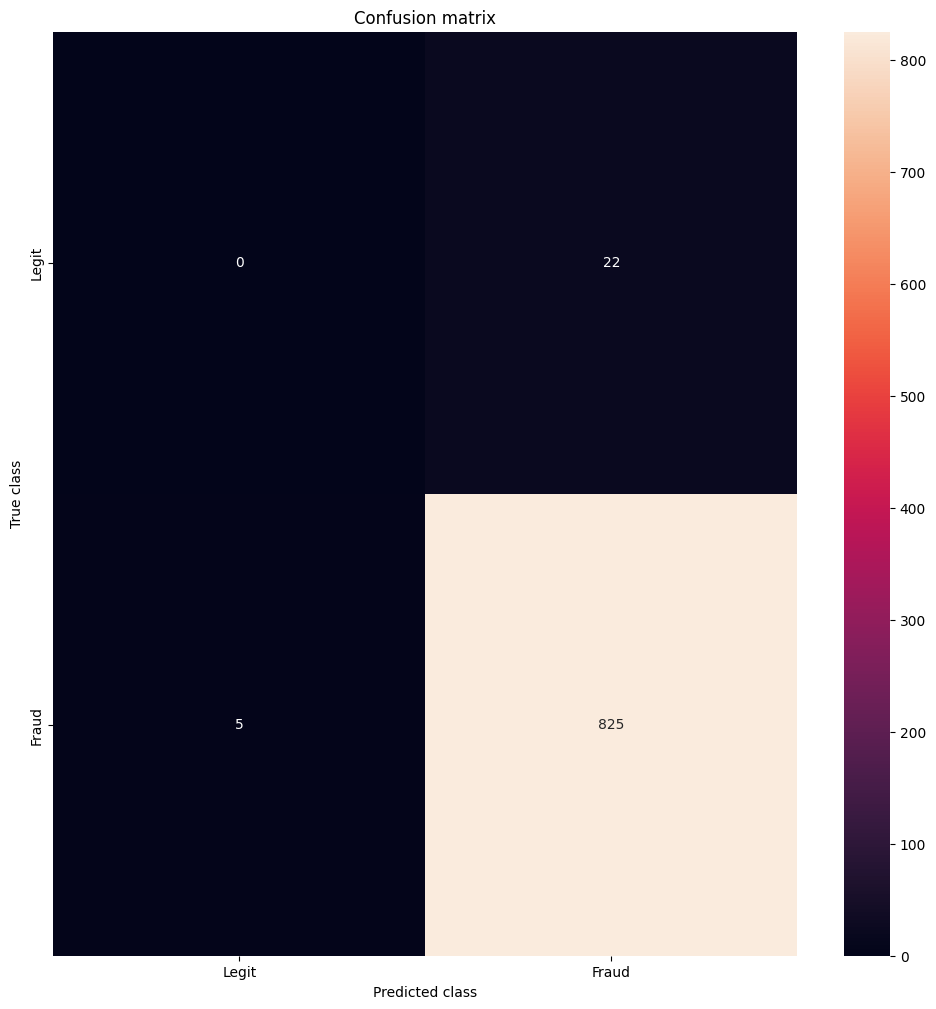

In [ ]:
LABELS = ['Legit', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# **Parameters to evaluate**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()

In [ ]:
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

The accuracy is 0.9683098591549296


In [ ]:
prec = precision_score(yTest, yPred, pos_label="LEGIT")
print("The precision is {}".format(prec))

The precision is 0.974025974025974


In [ ]:
rec = recall_score(yTest, yPred,  pos_label="LEGIT")
print("The recall is {}".format(rec))

The recall is 0.9939759036144579


In [ ]:
f1 = f1_score(yTest, yPred,  pos_label="LEGIT")
print("The F1-Score is {}".format(f1))

The F1-Score is 0.9838998211091233
